# Clusterización con K-Means

In [1]:
%load_ext watermark
%watermark

2019-07-16T16:56:14+02:00

CPython 3.6.8
IPython 6.2.1

compiler   : GCC 7.3.0
system     : Linux
release    : 4.13.0-46-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit


## Carga de Datos 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

warnings.filterwarnings('ignore')

In [3]:
df_rfm = pd.read_pickle('../Data/02.-Creacion-df_rfm-y-cuartiles.pkl')

df_rfm.head()

,CustomerID,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,Segment
0,12346.0,326.0,2.0,0.00,1,2,1,121,Lost
1,12347.0,3.0,6.0,3598.21,4,4,4,444,Best Customers
2,12348.0,76.0,4.0,1797.24,2,3,4,234,Almost Lost
3,12349.0,19.0,1.0,1757.55,3,1,4,314,Need Atention
4,12350.0,311.0,1.0,334.40,1,1,2,112,Lost


## Tratamiento de los Datos 

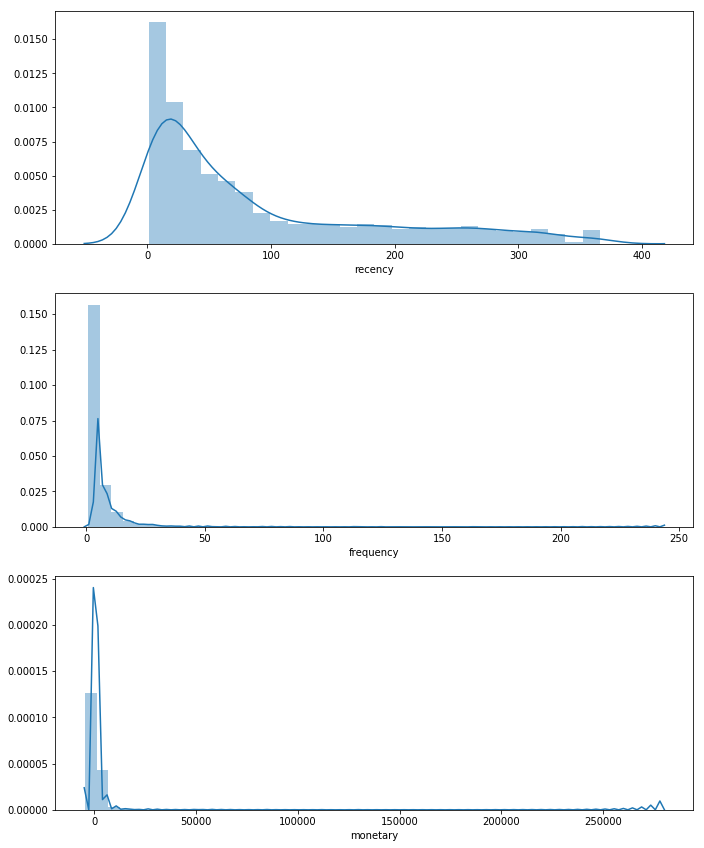

In [4]:
f,ax = plt.subplots(figsize=(10,12))
plt.subplot(3,1,1);sns.distplot(df_rfm['recency'],label = 'recency')
plt.subplot(3,1,2);sns.distplot(df_rfm['frequency'],label = 'frequency')
plt.subplot(3,1,3);sns.distplot(df_rfm['monetary'],label = 'monetary')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

## Escalado 

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
df_rfm_temp = df_rfm[['recency','frequency','monetary']]

df_rfm_temp.head()

,recency,frequency,monetary
0,326.0,2.0,0.00
1,3.0,6.0,3598.21
2,76.0,4.0,1797.24
3,19.0,1.0,1757.55
4,311.0,1.0,334.40


In [8]:
scaler = StandardScaler()
scaler.fit(df_rfm_temp)
df_rfm_scaled = scaler.transform(df_rfm_temp)

## Normalizado